In [95]:
########################################IMPORTS FOR READING IMAGES FROM A FOLDER ########################################
from pathlib import Path
import glob
import pandas as pd
import numpy as np
from PIL import Image
from resizeimage import resizeimage
import matplotlib as mp
import matplotlib.pyplot as plt
import cv2
import os

#######################################################General Imports######################################################
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras import backend as K
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import pydot
import pydotplus
from pydotplus import graphviz
from IPython.display import Image 
import os
import math
import h5py
import tkinter as tk
from tkinter import ttk
import json
import re
from gensim.models import Word2Vec
from gensim.test.utils import common_texts
import multiprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LeakyReLU
from sklearn.feature_extraction.text import TfidfVectorizer

In [109]:
##################################################################################################

In [414]:
#Reading Data
df = pd.read_csv('blogtext.csv')

In [415]:
#Dataset is Too Huge to Process....Considering only first 5000 Records
df = df[0:5000]

In [340]:
df.sample(5)

,id,gender,age,topic,sign,date,text
4691,4262796,male,17,indUnk,Aquarius,"17,August,2004",I would normally put this in the commen...
1766,589736,male,35,Technology,Aries,"05,August,2004",I am sadly unable to attend the Cir...
2645,589736,male,35,Technology,Aries,"05,August,2004",JLS - i've not heard of the differe...
660,3176655,male,24,Engineering,Libra,"03,July,2004",So did you catch Michelle Kwa...
1363,3413825,female,25,Student,Taurus,"23,May,2004",Kill Bill was actually pretty goo...


In [341]:
############################################DATA PROCESSING ################################################################

In [416]:
###############################################Generic Functions########################
def age(x):
     if((x >= 13) and (x <= 17)):
        return 1
     if((x >= 23) and (x <= 27)):
        return 2
     if((x >= 33) and (x <= 48)):
        return 3
    
################################################Dropping Unnecessary coluns##############
df = df.drop('date', axis=1)
df = df.drop('id', axis=1)
df = df.drop('sign', axis=1)
##################################################Labelling Columns######################
df['gender'] = df['gender'].apply(lambda x : 1 if(x=='male') else 0)
df['gender'] = df['gender'].astype('int32')
df['age'] = df['age'].apply(age).astype(int)
le = LabelEncoder()
df['topic'] = le.fit_transform(df['topic'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#print(le_name_mapping)

#Preprocess data
#convert all text to lowercase - use .lower()
#select only numbers, alphabets, and #+_ from text - use re.sub()
#strip all the text - use .strip() (this is for removing extra spaces)
df['text'] = df['text'].apply(lambda s: s.lower())
df['text'] = df['text'].apply(lambda s: re.sub('[^0-9a-z #+_]','',s))
df['text'] = df['text'].apply(lambda s: s.strip())

##################################################Splitting Data#########################

x_train, x_test, y_train, y_test = train_test_split(df['text'],df.drop('text', axis=1),test_size=0.2, random_state=10)

##################################################Applying CountVectorizer on x_train #############
vec = CountVectorizer(max_df=0.90, min_df=5,stop_words='english')
#vec = TfidfVectorizer()
x_train = vec.fit_transform(x_train)
x_test = vec.transform(x_test)
###################################################One Hot Encoding y_train ######################
enc = OneHotEncoder()
#enc = MultiLabelBinarizer()
y_train = enc.fit_transform(y_train)
y_test = enc.transform(y_test)

In [ ]:
#OneVsRestClassifier
#________________________________________________

#Algorithms such as the Perceptron, Logistic Regression, and Support Vector Machines were designed 
#for binary classification and do not natively support classification tasks with more than two classes.

#The One-vs-Rest strategy splits a multi-class classification into one binary classification problem per class.
#The One-vs-One strategy splits a multi-class classification into one binary classification problem per each pair of classes.


In [ ]:
######################################CountVectorizer with DecissionTree####################################################

In [ ]:
#################################################Decission Tree############################################################

In [24]:
ovr = OneVsRestClassifier(estimator=DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=10))

In [25]:
 ovr.fit(x_train, y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     random_state=10))

In [28]:
y_pred = ovr.predict(x_test)
print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, ovr.predict(x_train))))
print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
print("Precision Score : {0}\n".format(precision_score(y_test,y_pred, average=None)))
print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred, average=None)))
print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred, average=None)))

Train Accuracy  : 0.592

Test Accuracy   : 0.483

Precision Score : [0.75432526 0.81575246 0.72       0.51369863 0.8161435  0.
 1.         1.         0.33333333 0.42857143 0.375      0.
 0.5        0.57142857 0.33333333 0.92307692 0.         1.
 0.25       0.         1.         0.4        0.61403509 0.71724138
 0.81410256]

Recall Score    : [0.62464183 0.89093702 0.28125    0.390625   0.88636364 0.
 0.44444444 0.25       1.         0.28571429 0.375      0.
 0.17857143 0.42105263 0.16666667 0.66666667 0.         1.
 0.125      0.         0.36363636 0.28571429 0.28       0.92444444
 0.47211896]

F1 Score        : [0.68338558 0.85168869 0.40449438 0.44378698 0.84980545 0.
 0.61538462 0.4        0.5        0.34285714 0.375      0.
 0.26315789 0.48484848 0.22222222 0.77419355 0.         1.
 0.16666667 0.         0.53333333 0.33333333 0.38461538 0.80776699
 0.59764706]



In [ ]:
################ DECISSION TREE GIVING AN ACCURACY OF : 48%

In [ ]:
############################################CountVecotrizer with CatBoost###################################################

In [21]:
#################################################CAT BOOST##################################################################

In [38]:
ovr = OneVsRestClassifier(estimator=CatBoostClassifier(iterations=10,random_state=1))

In [39]:
ovr.fit(x_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5428331	total: 115ms	remaining: 1.04s
1:	learn: 0.4979006	total: 234ms	remaining: 937ms
2:	learn: 0.4718545	total: 356ms	remaining: 830ms
3:	learn: 0.4518772	total: 475ms	remaining: 712ms
4:	learn: 0.4345782	total: 603ms	remaining: 603ms
5:	learn: 0.4240319	total: 727ms	remaining: 485ms
6:	learn: 0.4136154	total: 848ms	remaining: 363ms
7:	learn: 0.4070950	total: 973ms	remaining: 243ms
8:	learn: 0.3997001	total: 1.1s	remaining: 122ms
9:	learn: 0.3915500	total: 1.24s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5428331	total: 132ms	remaining: 1.19s
1:	learn: 0.4979006	total: 252ms	remaining: 1.01s
2:	learn: 0.4718545	total: 374ms	remaining: 873ms
3:	learn: 0.4518772	total: 492ms	remaining: 738ms
4:	learn: 0.4345782	total: 610ms	remaining: 610ms
5:	learn: 0.4240319	total: 726ms	remaining: 484ms
6:	learn: 0.4136154	total: 848ms	remaining: 364ms
7:	learn: 0.4070950	total: 965ms	remaining: 241ms
8:	learn: 0.3997001	total: 1.08s	remaining: 121ms
9:	

8:	learn: 0.0050743	total: 1.26s	remaining: 140ms
9:	learn: 0.0044600	total: 1.4s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0313889	total: 151ms	remaining: 1.36s
1:	learn: 0.0031015	total: 315ms	remaining: 1.26s
2:	learn: 0.0008329	total: 482ms	remaining: 1.13s
3:	learn: 0.0003645	total: 647ms	remaining: 971ms
4:	learn: 0.0002070	total: 809ms	remaining: 809ms
5:	learn: 0.0001381	total: 963ms	remaining: 642ms
6:	learn: 0.0001034	total: 1.12s	remaining: 480ms
7:	learn: 0.0000805	total: 1.28s	remaining: 320ms
8:	learn: 0.0000654	total: 1.44s	remaining: 160ms
9:	learn: 0.0000553	total: 1.6s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0211216	total: 135ms	remaining: 1.21s
1:	learn: 0.0023861	total: 272ms	remaining: 1.09s
2:	learn: 0.0008355	total: 412ms	remaining: 961ms
3:	learn: 0.0004376	total: 545ms	remaining: 818ms
4:	learn: 0.0002723	total: 686ms	remaining: 686ms
5:	learn: 0.0001945	total: 819ms	remaining: 546ms
6:	learn: 0.0001469	total: 956ms	remaining: 410ms
7:	lea

OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x00000194091C6CF8>)

In [40]:
y_pred = ovr.predict(x_test)
print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, ovr.predict(x_train))))
print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
print("Precision Score : {0}\n".format(precision_score(y_test,y_pred, average=None)))
print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred, average=None)))
print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred, average=None)))

Train Accuracy  : 0.57

Test Accuracy   : 0.523

Precision Score : [0.87323944 0.79288437 0.69135802 0.8        0.80590717 0.
 1.         0.         0.         0.8        1.         0.
 1.         0.875      1.         0.93333333 0.         0.
 0.         0.         1.         1.         0.94117647 0.79060665
 0.96969697]

Recall Score    : [0.53295129 0.95852535 0.29166667 0.20833333 0.93019481 0.
 0.44444444 0.         0.         0.19047619 0.25       0.
 0.03571429 0.36842105 0.16666667 0.77777778 0.         0.
 0.         0.         0.18181818 0.28571429 0.128      0.89777778
 0.47583643]

F1 Score        : [0.66192171 0.86787204 0.41025641 0.33057851 0.86360211 0.
 0.61538462 0.         0.         0.30769231 0.4        0.
 0.06896552 0.51851852 0.28571429 0.84848485 0.         0.
 0.         0.         0.30769231 0.44444444 0.22535211 0.84079084
 0.63840399]



In [ ]:
#CATBOOST GIVING AN ACCURACY OF : 52%

In [ ]:
############################################CountVectorizer With NeuralNet##################################################

In [41]:
############################################### NEURAL NET #################################################################

In [417]:
model = tf.keras.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(1024, input_shape=(x_train.toarray().shape[1],)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(y_train.toarray().shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])          

In [30]:
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath='nn_nlp1', save_best_only=True, verbose=False)
training = model.fit(x_train.toarray(), y_train.toarray(), batch_size=10, epochs=5, validation_data=(x_test.toarray(), y_test.toarray()),verbose=True, callbacks=[ckpt_callback])

Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 194s 49ms/sample - loss: 6.1112 - acc: 0.4245 - val_loss: 5.7556 - val_acc: 0.6870
Epoch 2/5
4000/4000 [==============================] - 195s 49ms/sample - loss: 4.9237 - acc: 0.4283 - val_loss: 5.6401 - val_acc: 0.5450
Epoch 3/5
4000/4000 [==============================] - 190s 48ms/sample - loss: 4.3557 - acc: 0.4433 - val_loss: 5.4817 - val_acc: 0.5500
Epoch 4/5
4000/4000 [==============================] - 189s 47ms/sample - loss: 4.0866 - acc: 0.4150 - val_loss: 5.4062 - val_acc: 0.5660
Epoch 5/5
4000/4000 [==============================] - 188s 47ms/sample - loss: 3.9062 - acc: 0.3990 - val_loss: 5.6214 - val_acc: 0.4810


In [31]:
model.load_weights('nn_nlp')

In [32]:
model.evaluate(x_test, y_test)

1000/1000 [==============================] - 2s 2ms/sample - loss: 5.4062 - acc: 0.5660 0s - loss: 5.4032 - acc: 0.565


[5.406211479187012, 0.566]

In [35]:
y_pred = model.predict(x_test)

In [37]:
#Printing Classification Matrix
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.15      0.26       349
           1       0.87      0.79      0.83       651
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         0

    accuracy                           0.57      1000
   macro avg       0.16      0.09      0.10      1000
weighted avg       0.89      0.57      0.63      1000



In [ ]:
######################################NEURALNET GIVING AN ACCURACY OF : 56.6%

In [420]:
#model.save('stat_nlp')
#model.load_weights('nn_nlp1')

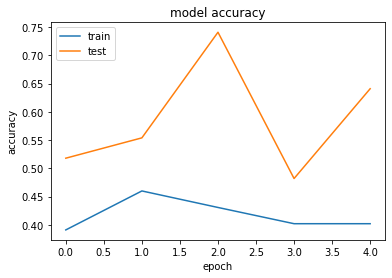

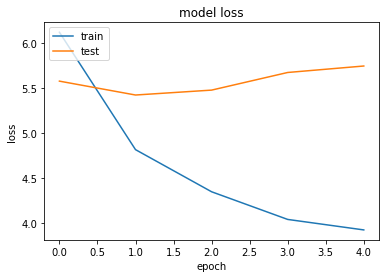

In [424]:
history=training
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [432]:
#Function to Predicting Few Random String ---- 
def MyPredict(string):
    print(np.argmax(model.predict(vec.transform([string])), axis=1))

In [433]:
MyPredict("Hi How are you I am doing good and expect that you are fine too")

[1]


In [ ]:
#########################Predicting Values and see if they are equal to Original ...........

In [437]:
np.argmax(model.predict(x_test[0]), axis=1)

array([0], dtype=int64)

In [441]:
np.argmax(y_test[0], axis=1)

matrix([[0]])

In [446]:
np.argmax(model.predict(x_test[5]), axis=1)

array([1], dtype=int64)

In [444]:
np.argmax(y_test[5], axis=1)

matrix([[1]])

In [447]:
np.argmax(model.predict(x_test[50]), axis=1)

array([1], dtype=int64)

In [448]:
np.argmax(y_test[50], axis=1)

matrix([[1]])

In [449]:
np.argmax(model.predict(x_test[100]), axis=1)

array([1], dtype=int64)

In [454]:
np.argmax(y_test[100], axis=1)

matrix([[1]])

In [452]:
np.argmax(model.predict(x_test[120]), axis=1)

array([4], dtype=int64)

In [453]:
np.argmax(y_test[120], axis=1)

matrix([[1]])

In [ ]:
############THI IS PURELY EXPERIMENTAL TO SHOW CNN CAN ALSO BE USED

In [ ]:
###########################################################################################

In [ ]:
#########################################################################################################################

In [ ]:
#                    DATA PROCESSING WITH WORD2VEC AND APPLYING CNNN                                                     #

In [61]:
##########################################################################################################################

In [316]:
#Reading Data
df = pd.read_csv('blogtext.csv')
df = df[0:5000]

#Preprocess data
#convert all text to lowercase - use .lower()
#select only numbers, alphabets, and #+_ from text - use re.sub()
#strip all the text - use .strip() (this is for removing extra spaces)
df['text'] = df['text'].apply(lambda s: s.lower())
#df['text'] = df['text'].apply(lambda s: re.sub('[^0-9a-z #+_]','',s))
df['text'] = df['text'].apply(lambda s: re.sub('[^A-Za-z0-9]+','',s))
df['text'] = df['text'].apply(lambda s: s.strip())


#Using Word2vec and Converting the df['text'] to their corresponding vectors ...here for simplicity
#the vecotr size is 10 :) ...The Original df is saved to df_original and deleted df['text']
#I dint find a direct fit_transform function for word2vec as in case of Countvectorizer and TfIdf ...so 
#Tried This way
sentences = [row.split() for row in df['text']]   
words = [item for words in sentences for item in words]
vec_model = Word2Vec(sentences=sentences,vector_size=100, window=5, min_count=1, workers=4)
vec_model.build_vocab(sentences)
vec_model.train(sentences, total_examples=vec_model.corpus_count, epochs=30)
df['text_vec'] = df['text'].apply(lambda x : vec_model.wv[x.split()].ravel() if(x) else np.zeros(100))
df_original = df.copy()
del(df['text'])


###############################################Generic Functions########################
def age(x):
     if((x >= 13) and (x <= 17)):
        return 1
     if((x >= 23) and (x <= 27)):
        return 2
     if((x >= 33) and (x <= 48)):
        return 3
    
################################################Dropping Unnecessary coluns##############
df = df.drop('date', axis=1)
df = df.drop('id', axis=1)
df = df.drop('sign', axis=1)
##################################################Labelling Columns######################
df['gender'] = df['gender'].apply(lambda x : 1 if(x=='male') else 0)
df['gender'] = df['gender'].astype('int32')
df['age'] = df['age'].apply(age).astype(int)
le = LabelEncoder()
df['topic'] = le.fit_transform(df['topic'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#print(le_name_mapping)


##################################################Splitting Data#########################

x_train, x_test, y_train, y_test = train_test_split(df['text_vec'],df.drop('text_vec', axis=1),test_size=0.2, random_state=10)

###################################################One Hot Encoding y_train ######################
enc = OneHotEncoder()
#enc = MultiLabelBinarizer()
y_train = enc.fit_transform(y_train)
y_test = enc.transform(y_test)

#####################################Finally Padding as Model expects Equal Size Messages#################################
########## Using pad_sequences from Tensorflow for this  #################################################################
x_train = pad_sequences(x_train, maxlen=300, padding='pre', truncating='post')
x_test = pad_sequences(x_test, maxlen=300, padding='pre', truncating='post')

################################################### Printing #####################################
print(le_name_mapping)

{'Accounting': 0, 'Arts': 1, 'Automotive': 2, 'Banking': 3, 'BusinessServices': 4, 'Communications-Media': 5, 'Consulting': 6, 'Education': 7, 'Engineering': 8, 'Internet': 9, 'InvestmentBanking': 10, 'Law': 11, 'Museums-Libraries': 12, 'Non-Profit': 13, 'Religion': 14, 'Science': 15, 'Sports-Recreation': 16, 'Student': 17, 'Technology': 18, 'indUnk': 19}


In [318]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(10, kernel_size=(5), activation='relu', input_shape=(x_train.shape[1],1)))
model.add(layers.Conv1D(10, kernel_size=(5), activation='relu'))
model.add(layers.MaxPool1D(3))
model.add(layers.Conv1D(16, kernel_size=(5), activation='relu'))
model.add(layers.Conv1D(16, kernel_size=(5), activation='relu'))
model.add(layers.MaxPool1D(3))
model.add(layers.Conv1D(128, kernel_size=(5), activation='relu'))
model.add(layers.Conv1D(128, kernel_size=(5), activation='relu'))
model.add(layers.MaxPool1D(3))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath='cnn_w2vec_nlp', save_best_only=True, verbose=False)
training = model.fit(x_train.reshape(x_train.shape[0],x_train.shape[1] ,1), y_train, batch_size=10, nb_epoch=5, validation_data=(x_test.reshape(x_test.shape[0],x_test.shape[1],1), y_test),verbose=True, callbacks=[ckpt_callback])

Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 21s 5ms/sample - loss: 9.0259 - acc: 0.4925 - val_loss: 8.4848 - val_acc: 0.6510
Epoch 2/5
4000/4000 [==============================] - 16s 4ms/sample - loss: 8.0407 - acc: 0.6607 - val_loss: 7.7146 - val_acc: 0.6510
Epoch 3/5
4000/4000 [==============================] - 16s 4ms/sample - loss: 7.4106 - acc: 0.6607 - val_loss: 7.2434 - val_acc: 0.6510
Epoch 4/5
4000/4000 [==============================] - 17s 4ms/sample - loss: 7.0287 - acc: 0.6607 - val_loss: 6.9658 - val_acc: 0.6510
Epoch 5/5
4000/4000 [==============================] - 17s 4ms/sample - loss: 6.8032 - acc: 0.6607 - val_loss: 6.8049 - val_acc: 0.6510


In [319]:
model.evaluate(x_test.reshape(x_test.shape[0], x_test.shape[1],1), y_test)

1000/1000 [==============================] - 1s 678us/sample - loss: 6.8049 - acc: 0.6510


[6.804876007080078, 0.651]

In [ ]:
################## PART2

In [ ]:
###########################################################################################################################

In [ ]:
########################################### CHATBOT ########################################################################

In [ ]:
###########################################################################################################################

In [143]:
#Reading the Data from Json file.
data = json.load(open('GL Bot.json'))

In [144]:
#Building a DataFrame out of 'data'
#Pattern and Response are the only Two Things We Need to Build the Model....
#The Ouput of the model is fed to "data" and we will print the Response (So No need for the 'Response' to be part of df)
df = pd.DataFrame(columns=['Patterns','Tag'])
df['Patterns'] = pd.Series([patterns for element in data['intents'] for patterns in element['patterns']])
df['Tag'] = pd.Series([element['tag'] for element in data['intents'] for patterns in element['patterns']])

In [145]:
#Just to see How many Patterns from each Tag :)
df.groupby('Tag')['Patterns'].describe()

,count,unique,top,freq
Tag,,,,
Bot,8,8,what are your working hours,1
Exit,16,16,see you later,1
Intro,20,19,i am from,2
NN,24,24,weights,1
Olympus,13,13,no access to olympus,1
Profane,9,9,you are a joke,1
SL,29,29,i am not able to understand logistic regression,1
Ticket,9,9,wasted my time,1


In [146]:
#Here Taking the exact order from .json file so that I can directly pass it to "data" to get the Response
# Ex : data['intents'][0]['responses']  will Give Resoponse related to Intro

df['Tag'] = df['Tag'].map({'Intro': 0, 'Exit':1, 'Olympus':2, 'SL': 3, 'NN': 4, 'Bot':5,'Profane':6,'Ticket':7})

In [147]:
#Taking Entire Data ..Its Overfitting in 2 sec :)....So Splitting 
x_train, x_test, y_train, y_test = train_test_split(df['Patterns'],df['Tag'],test_size=0.1, random_state=10)

In [148]:
#Preparing Data for the Neural Net -- Here I am Planning to Use TFidfVectorizer
#Here i see no need to clean the data as its clean
#Used TFIDF as it as it not only focuses on frequency of words present in the corpus but importance of words in all docs.
tf_idf = TfidfVectorizer()
x_train = tf_idf.fit_transform(x_train)
x_test = tf_idf.transform(x_test)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [151]:
x_train.shape

(115, 147)

In [236]:
#Mode Preparation .....................
model = tf.keras.Sequential()
model.add(layers.Dense(64, input_shape=(x_train.toarray().shape[1],)))
model.add(LeakyReLU(alpha=0.2))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32))
model.add(LeakyReLU(alpha=0.2))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16))
model.add(LeakyReLU(alpha=0.3))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(df['Tag'].value_counts().shape[0], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath='simple_chat_bot', save_best_only=True, verbose=False)
model.fit(x_train.toarray(),y_train, epochs=100, batch_size=1, validation_data=(x_test.toarray(),y_test),verbose=1,callbacks=[ckpt_callback])

Train on 115 samples, validate on 13 samples
Epoch 1/100
115/115 [==============================] - 8s 71ms/sample - loss: 2.0967 - acc: 0.1130 - val_loss: 2.0462 - val_acc: 0.1538
Epoch 2/100
115/115 [==============================] - 1s 9ms/sample - loss: 1.9982 - acc: 0.2348 - val_loss: 2.0092 - val_acc: 0.1538
Epoch 3/100
115/115 [==============================] - 1s 9ms/sample - loss: 1.9527 - acc: 0.2870 - val_loss: 1.9777 - val_acc: 0.2308
Epoch 4/100
115/115 [==============================] - 1s 9ms/sample - loss: 1.8730 - acc: 0.3043 - val_loss: 1.9152 - val_acc: 0.3077
Epoch 5/100
115/115 [==============================] - 1s 9ms/sample - loss: 1.8025 - acc: 0.2783 - val_loss: 1.8024 - val_acc: 0.3077
Epoch 6/100
115/115 [==============================] - 1s 9ms/sample - loss: 1.6824 - acc: 0.3565 - val_loss: 1.7115 - val_acc: 0.3077
Epoch 7/100
115/115 [==============================] - 1s 9ms/sample - loss: 1.5466 - acc: 0.4348 - val_loss: 1.6361 - val_acc: 0.2308
Epoch 8/1

Epoch 61/100
115/115 [==============================] - 1s 9ms/sample - loss: 0.0983 - acc: 0.9478 - val_loss: 1.2387 - val_acc: 0.6923
Epoch 62/100
115/115 [==============================] - 1s 8ms/sample - loss: 0.1294 - acc: 0.9565 - val_loss: 1.2272 - val_acc: 0.6923
Epoch 63/100
115/115 [==============================] - 1s 9ms/sample - loss: 0.1731 - acc: 0.9217 - val_loss: 1.2108 - val_acc: 0.6923
Epoch 64/100
115/115 [==============================] - 1s 8ms/sample - loss: 0.0882 - acc: 0.9739 - val_loss: 1.3428 - val_acc: 0.6923
Epoch 65/100
115/115 [==============================] - 1s 8ms/sample - loss: 0.0628 - acc: 0.9913 - val_loss: 1.4009 - val_acc: 0.6923
Epoch 66/100
115/115 [==============================] - 1s 9ms/sample - loss: 0.1278 - acc: 0.9652 - val_loss: 1.3435 - val_acc: 0.6923
Epoch 67/100
115/115 [==============================] - 1s 9ms/sample - loss: 0.0740 - acc: 0.9826 - val_loss: 1.3536 - val_acc: 0.6923
Epoch 68/100
115/115 [==========================

In [239]:
#Further Running for Few More Epochs........................
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath='simple_chat_bot', save_best_only=True, verbose=False)
training = model.fit(x_train.toarray(),y_train, epochs=50, batch_size=1, validation_data=(x_test.toarray(),y_test),verbose=1,callbacks=[ckpt_callback])

Train on 115 samples, validate on 13 samples
Epoch 1/50
115/115 [==============================] - 1s 7ms/sample - loss: 0.1133 - acc: 0.9565 - val_loss: 0.5467 - val_acc: 0.7692
Epoch 2/50
115/115 [==============================] - 1s 6ms/sample - loss: 0.1488 - acc: 0.9478 - val_loss: 0.5419 - val_acc: 0.8462
Epoch 3/50
115/115 [==============================] - 1s 6ms/sample - loss: 0.0698 - acc: 0.9826 - val_loss: 0.6325 - val_acc: 0.8462
Epoch 4/50
115/115 [==============================] - 1s 6ms/sample - loss: 0.0635 - acc: 0.9739 - val_loss: 0.6466 - val_acc: 0.7692
Epoch 5/50
115/115 [==============================] - 1s 6ms/sample - loss: 0.0702 - acc: 0.9826 - val_loss: 0.6215 - val_acc: 0.7692
Epoch 6/50
115/115 [==============================] - 1s 7ms/sample - loss: 0.0805 - acc: 0.9826 - val_loss: 0.6370 - val_acc: 0.7692
Epoch 7/50
115/115 [==============================] - 1s 8ms/sample - loss: 0.1160 - acc: 0.9652 - val_loss: 0.6537 - val_acc: 0.7692
Epoch 8/50
115/11

In [319]:
#Just to check how the Model Looks
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_215 (Dense)            (None, 64)                9472      
_________________________________________________________________
leaky_re_lu_66 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dropout_118 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_216 (Dense)            (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_67 (LeakyReLU)   (None, 32)                0         
_________________________________________________________________
dropout_119 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_217 (Dense)            (None, 16)                528       
__________

In [241]:
#model.save('simple_chat_bot')
#Saved Model ....Getting 84.6 accuracy

In [320]:
#Just for confirmation ..Loading the saved - 'simple_chat_bot' model
model = tf.keras.models.load_model('simple_chat_bot')

In [242]:
model.evaluate(x_test.toarray(),y_test)

13/13 [==============================] - 0s 504us/sample - loss: 0.5777 - acc: 0.8462


[0.5777449607849121, 0.84615386]

In [ ]:
################################# I could have trained with entire data to get 100% Accuarcy but no way to Test Effeciency

#..But because of splitting I can test and enchance my Model - #I found "Leaky Relu" performing better 
#as I seen few negative values in vectors generated by TfIdf

#To Reduce the Overfit , I tried Reducing the 'Number of Neurons' and also introduced Dropouts, I want
#to experiment more with the alpha value of the LeakyRelu but time dint permit .....


################################ MAXIMUM VALIDATION ACCURACY : 84.6 

In [ ]:
########Before Goint to ChatBot and Putting in to User Input and Response Let Us Write a Function and check it Manually 
##################### AT THIS POINT I Thought of Naming my Bot as "Suprina" :) ############################################

In [ ]:
#My Function to Transoform a Given String and Give to Model and Find the Response from the Data :)
def Chat(msg):
    print("Suprina: "+str(data['intents'][np.argmax(model.predict(tf_idf.transform([msg])))]['responses'])+"\n")

In [310]:
Chat("Hi How Are You")

Suprina: ['Hello! how can i help you ?']


In [311]:
Chat("I dont understand svm")

Suprina: ['Link: Machine Learning wiki ']


In [312]:
Chat("you are stupid")

Suprina: ['Please use respectful words']


In [313]:
Chat("who are you")

Suprina: ['I am your virtual learning assistant']


In [314]:
Chat("How many epochs should I use")

Suprina: ['Link: Neural Nets wiki']


In [315]:
Chat("Are you Human")

Suprina: ['I am your virtual learning assistant']


In [316]:
Chat("are you female")

Suprina: ['I am your virtual learning assistant']


In [309]:
#####  HERE SHE RAN AWAY ......................
Chat("will you marry me")

Suprina: ['I hope I was able to assist you, Good Bye']


In [ ]:
#########################################################################################################################

In [ ]:
############## RUNNING AN INFINTE LOOP --- JUST TO GET THE FEEL OF A BOT .....

In [ ]:
########################################################################################################################

In [337]:
print("______________________________________________________________________________")
print(r"Suprina(Your Virtual Assistance) 'Quit' to stop the conversation\n")
print("______________________________________________________________________________")

while(True):
    print("\n")
    usr_resp = input("You:")
        
    if(usr_resp =='quit'):        
        break
        
    Chat(usr_resp)    
            

______________________________________________________________________________
Suprina(Your Virtual Assistance) 'Quit' to stop the conversation\n
______________________________________________________________________________


You:Hi Suprina how you doing
Suprina: ['Hello! how can i help you ?']


You:what is difference between bagging and boosting
Suprina: ['Link: Machine Learning wiki ']


You:screw you
Suprina: ['Please use respectful words']


You:are you female 
Suprina: ['I am your virtual learning assistant']


You:you are useless bot
Suprina: ['Tarnsferring the request to your PM']


You:I love you
Suprina: ['I hope I was able to assist you, Good Bye']


You:quit


In [ ]:
#Used only basic TFIDF --- Time dint permit to use others....The Ideas was to use Word2vec and replace the words the 
#Sentence with vectors for each word that word2vec generates and then pass this vectors to Neural Net or CNN as I did
#n the part one of project but really out of time ....... 

#ALSO COULD NOT ADD TO THE CORPUS(.json) file given by GL.......Well its difficult as my linguistic skills are not great :)
#Model for sure will perfom better with more things added to Corpus....

#Here the myth that Neural Nets need a huge data to get things working is also addressed ........ :)
